In [1]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load the data
data = pd.read_excel('VCT_DATASET.xlsx')
test_data = pd.read_excel('Test_VCT_DATASET.xlsx').dropna(how='any',axis=0)

In [3]:
# Select features and target variable
features = ['rounds', 'rating', 'kills_per_round', 'assists_per_round',
            'first_kills_per_round', 'first_deaths_per_round', 'headshot_percentage',
            'clutch_success_percentage', 'total_kills', 'total_deaths', 'total_assists',
            'total_first_kills', 'total_first_deaths']

target_variable = 'average_combat_score'

In [4]:
# Split variables
X_train = data[features]
X_test = test_data[features]
y_train = data[target_variable]
y_test = test_data[target_variable]

In [5]:
# Initialize the XGBoost Regressor
model = XGBRegressor()

In [6]:
# Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test.to_numpy())

In [8]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mean Squared Error: 98.51821786988859


In [ ]:
#With Hyperparameter tuning

In [17]:
from sklearn.pipeline import Pipeline

estimators = [
    ('clf', XGBRegressor(random_state=8)) # can customize objective function with the objective parameter
]
pipe = Pipeline(steps=estimators)
pipe

NameError: name 'TargetEncoder' is not defined

In [37]:
#Set up hyperparameter tuning
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring='neg_mean_squared_error', random_state=8) 
# in reality, you may consider setting cv and n_iter to higher values

In [ ]:
#Train opt

In [38]:
opt.fit(X_train, y_train)

ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [ ]:
#Evaluate the model and make predictions

In [35]:
opt.best_estimator_

Pipeline(steps=[('clf',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=0.6854728136721551,
                              colsample_bynode=0.9716292421559054,
                              colsample_bytree=0.9999681720272138,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=9.269342703724346,
                              gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.4165635668761467, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
              

In [36]:
opt.best_score_

-143.00791972587555

In [25]:
opt.score(X_test.to_numpy(), y_test.to_numpy())

-7.917469684342692

In [26]:
opt.predict(X_test.to_numpy())

array([251.82414 , 213.03299 , 212.20334 , 179.61798 , 222.17757 ,
       189.8933  , 229.28864 , 183.05191 , 198.1168  , 204.41254 ,
       186.04352 , 170.07732 , 154.48155 , 164.18916 , 163.46346 ,
       211.12349 , 198.88983 , 169.67668 , 163.50594 , 205.52733 ,
       177.14865 , 183.68823 , 177.83635 , 134.97447 , 128.83424 ,
       189.38808 , 135.62488 , 158.68575 , 122.07691 , 268.21637 ,
       237.32942 , 213.44466 , 218.80188 , 255.30623 , 217.44482 ,
       215.10684 , 227.17123 , 172.47452 , 176.47969 , 231.9087  ,
       208.4778  , 169.41302 , 192.18837 , 225.12259 , 223.43666 ,
       159.87743 , 158.10582 , 221.52217 , 179.09418 , 177.7584  ,
       165.68819 , 165.87259 , 182.2558  , 159.20161 , 191.45694 ,
       163.1379  , 210.30661 , 172.98422 , 169.95847 , 175.84363 ,
       142.45761 , 152.84901 , 148.66771 , 123.49977 , 151.79555 ,
       169.0583  , 155.02905 , 157.29372 , 118.39572 , 108.69871 ,
       232.38167 , 228.9261  , 229.46643 , 200.1537  , 237.214

In [ ]:
#Measure feature importance 

In [30]:
opt.best_estimator_.steps

[('clf',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=0.6854728136721551,
               colsample_bynode=0.9716292421559054,
               colsample_bytree=0.9999681720272138, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=9.269342703724346, gpu_id=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.4165635668761467, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=8, ...))]

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

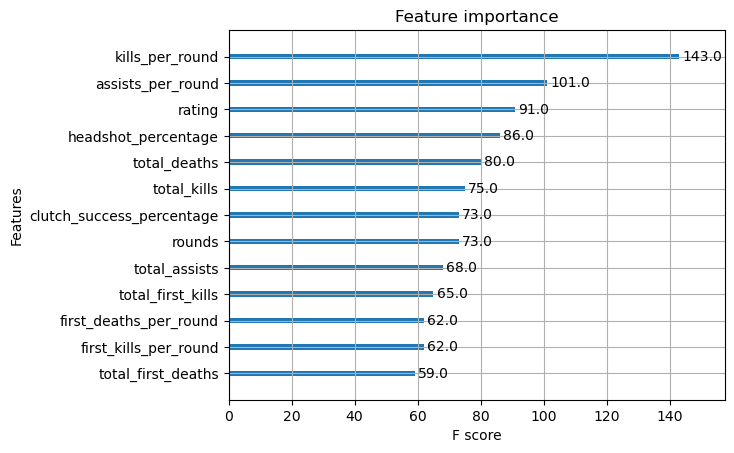

In [32]:
from xgboost import plot_importance

xgboost_step = opt.best_estimator_.steps[0]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)